In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import linregress
import scipy.stats as st
import sklearn.datasets as dta
import seaborn as sns
import matplotlib.style as style

In [2]:
video_game_sales_path = "Resources/Video_Games_Sales_as_at_22_Dec_2016.csv"
video_game_sales_df = pd.read_csv(video_game_sales_path)

In [3]:
video_game_sales_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# Elliott Einstein Questions


Are video gamers buying games because of genre types or because of the ratings of the game?

If the rating is higher, is a game more likely to be purchased or is it based on genre?

What is the highest and lowest purchased game by genre filtered by rating?

In [4]:
#Checking for null values in the dataset.
video_game_sales_df.count()
video_game_sales_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [5]:
# Dropping Null Values 
no_null_video_game_sales_df = video_game_sales_df.dropna(how='any')
video_game_sales_df=no_null_video_game_sales_df 
no_null_video_game_sales_df.count()

Name               6825
Platform           6825
Year_of_Release    6825
Genre              6825
Publisher          6825
NA_Sales           6825
EU_Sales           6825
JP_Sales           6825
Other_Sales        6825
Global_Sales       6825
Critic_Score       6825
Critic_Count       6825
User_Score         6825
User_Count         6825
Developer          6825
Rating             6825
dtype: int64

In [6]:
# Verifying Dropped Null Values and Dtypes
no_null_video_game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [7]:
# Changing dtype of User_Score
no_null_video_game_sales_df['User_Score'] = no_null_video_game_sales_df['User_Score'].astype(float)

<ipython-input-7-5510fc2535de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null_video_game_sales_df['User_Score'] = no_null_video_game_sales_df['User_Score'].astype(float)


In [8]:
#Verifying change and checking the sum
no_null_video_game_sales_df.info()
no_null_video_game_sales_df["User_Count"].sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 906.4+ KB


1192480.0

In [9]:
#Aggregrating the mean of the user_score based on the rating and genre
rating_by_genre= pd.DataFrame(no_null_video_game_sales_df.groupby(['Genre','Rating'])['User_Score'].agg('mean'))
rating_by_genre

User_Score
Genre        Rating            
Action       AO        8.600000
             E         6.742932
             E10+      6.831438
             M         7.312926
             T         7.137113
Adventure    E         6.546939
             E10+      6.375000
             M         7.518824
             T         7.463415
Fighting     E         6.350000
             E10+      6.607143
             M         7.297778
             T         7.351757
Misc         E         6.758896
             E10+      6.837500
             K-A       7.400000
             M         6.736364
             T         6.977519
Platform     E         7.552917
             E10+      6.892308
             M         7.533333
             T         7.516071
Puzzle       E         7.317978
             E10+      7.179167
             T         6.400000
Racing       E         7.161143
             E10+      7.025316
             M         5.288235
             T         7.231852
Role-Playing E         7.972603
             E10+      7.399000
             M         7.325658
             T         7.723514
Shooter      E         7.640909
             E10+      7.261765
             M         6.997706
             T         7.185614
Simulation   E         7.028155
             E10+      6.885714
             M         7.460000
             T         7.350311
Sports       E         7.173475
             E10+      6.616216
             M         7.036364
             T         7.016346
Strategy     E         7.352381
             E10+      6.782258
             M         7.029167
             RP        6.800000
             T         7.669565

In [10]:
#reseting the index and deleting bad data
no_index_rating_by_genre=rating_by_genre.reset_index()
cleaned_no_index_rating_by_genre=no_index_rating_by_genre.drop(no_index_rating_by_genre.index[[0,15,48]])

In [11]:
#looks like Puzzle Genre type is missing a value (have to set to 0)
cleaned_no_index_rating_by_genre['Rating'].value_counts()
cleaned_no_index_rating_by_genre

,Genre,Rating,User_Score
1,Action,E,6.742932
2,Action,E10+,6.831438
3,Action,M,7.312926
4,Action,T,7.137113
5,Adventure,E,6.546939
6,Adventure,E10+,6.375000
7,Adventure,M,7.518824
8,Adventure,T,7.463415
9,Fighting,E,6.350000
10,Fighting,E10+,6.607143


In [12]:
#Used this code to check for individiluzed rating and user_score
#E_Rating=cleaned_no_index_rating_by_genre.loc[cleaned_no_index_rating_by_genre['Rating']=="E"]
#E_Rating
#E_Rating['User_Score'].tolist()

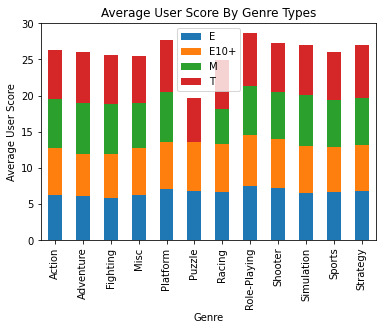

In [13]:
#Graph of the average user score by genre type
stacked_bar_chart_avg_user_genre = pd.DataFrame(index=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle','Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy'], 
                                                data = {'E': [6.277486910994765,6.122448979591836,5.833333333333333,6.306748466257669,7.104166666666667,6.876404494382022,6.731428571428571,7.534246575342466,7.2272727272727275,6.592233009708738,6.704244031830239,6.880952380952381], 
                        'E10+': [6.431438127090301,5.84375,6.142857142857143,6.3875,6.4423076923076925,6.75,6.620253164556962,6.96,6.794117647058823,6.5,6.162162162162162,6.241935483870968], 
                        'M': [6.861759425493716,7.0588235294117645,6.8,6.2727272727272725,7.0,0,4.823529411764706,6.842105263157895,6.537284894837476,7.0,6.545454545454546,6.583333333333333], 
                        'T': [6.694158075601375, 7.048780487804878,6.875399361022364,6.51937984496124,7.089285714285714,6.0,6.792592592592593,7.281653746770026,6.76140350877193,6.906832298136646,6.586538461538462,7.239130434782608]})

ax = stacked_bar_chart_avg_user_genre.plot(kind="bar", stacked=True)
plt.title("Average User Score By Genre Types")
plt.xlabel("Genre")
plt.ylabel("Average User Score")
plt.show()


In [14]:
#aggregation of games purchased
games_purchased= pd.DataFrame(no_null_video_game_sales_df.groupby(['Genre','Rating'])['User_Score'].agg('count'))
games_purchased

User_Score
Genre        Rating            
Action       AO               1
             E              191
             E10+           299
             M              557
             T              582
Adventure    E               49
             E10+            32
             M               85
             T               82
Fighting     E                6
             E10+            14
             M               45
             T              313
Misc         E              163
             E10+            80
             K-A              1
             M               11
             T              129
Platform     E              240
             E10+           104
             M                3
             T               56
Puzzle       E               89
             E10+            24
             T                5
Racing       E              350
             E10+            79
             M               17
             T              135
Role-Playing E               73
             E10+           100
             M              152
             T              387
Shooter      E               22
             E10+            34
             M              523
             T              285
Simulation   E              103
             E10+            28
             M                5
             T              161
Sports       E              754
             E10+            74
             M               11
             T              104
Strategy     E               42
             E10+            62
             M               24
             RP               1
             T              138

In [15]:
#reset index
no_index_games_purchased=games_purchased.reset_index()
#dropped bad data
cleaned_no_index_games_purchased=no_index_games_purchased.drop(no_index_games_purchased.index[[0,15,48]])
#checked data deletion
cleaned_no_index_games_purchased
#renamed column
number_of_purchased_games = cleaned_no_index_games_purchased.rename(columns={'User_Score': 'Number of Games'})
#quick check
number_of_purchased_games

,Genre,Rating,Number of Games
1,Action,E,191
2,Action,E10+,299
3,Action,M,557
4,Action,T,582
5,Adventure,E,49
6,Adventure,E10+,32
7,Adventure,M,85
8,Adventure,T,82
9,Fighting,E,6
10,Fighting,E10+,14


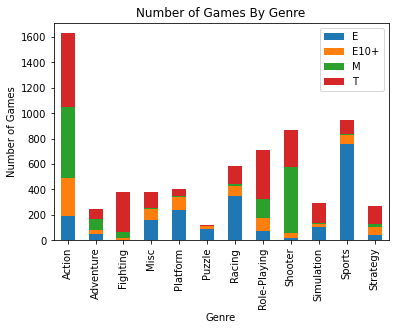

In [16]:
#Graph of the number of games purchased by genre type
stacked_bar_chart_games_purchased_by_genre = pd.DataFrame(index=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle','Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy'], 
                                                data = {'E': [191, 49, 6, 163, 240, 89, 350, 73, 22, 103, 754, 42], 
                        'E10+': [299, 32, 14, 80, 104, 24, 79, 100, 34, 28, 74, 62], 
                        'M': [557, 85, 45, 11, 3, 0, 17, 152, 523, 5, 11, 24], 
                        'T': [582, 82, 313, 129, 56, 5, 135, 387, 285, 161, 104, 138]})

stacked_bar_chart_games_purchased_by_genre=stacked_bar_chart_games_purchased_by_genre.plot(kind="bar", stacked=True)
plt.title("Number of Games By Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.show()

In [17]:
#count aggregation to genre by rating
count_genre_by_rating= pd.DataFrame(no_null_video_game_sales_df.groupby(['Genre','Rating'])['Genre'].agg('count'))
#rename column
count_genre_by_rating= count_genre_by_rating.rename(columns={'Genre': 'Genre_Count'})
#checking df
count_genre_by_rating

Genre_Count
Genre        Rating             
Action       AO                1
             E               191
             E10+            299
             M               557
             T               582
Adventure    E                49
             E10+             32
             M                85
             T                82
Fighting     E                 6
             E10+             14
             M                45
             T               313
Misc         E               163
             E10+             80
             K-A               1
             M                11
             T               129
Platform     E               240
             E10+            104
             M                 3
             T                56
Puzzle       E                89
             E10+             24
             T                 5
Racing       E               350
             E10+             79
             M                17
             T               135
Role-Playing E                73
             E10+            100
             M               152
             T               387
Shooter      E                22
             E10+             34
             M               523
             T               285
Simulation   E               103
             E10+             28
             M                 5
             T               161
Sports       E               754
             E10+             74
             M                11
             T               104
Strategy     E                42
             E10+             62
             M                24
             RP                1
             T               138

In [18]:
#seting df to new df
reset_genre_count=count_genre_by_rating 
#resetting the index
reset_genre_count=count_genre_by_rating.reset_index()
#checking 
reset_genre_count
#deleting bad data
reset_genre_count=reset_genre_count.drop(reset_genre_count.index[[0,15,48]])

In [19]:
#Creating the Table for Rating and Genre types
genre_counting_df=pd.DataFrame([('E',191, 49, 6, 163, 240, 89, 350, 73, 22, 103, 754, 42), ('E10+',299, 32, 14, 80, 104, 24, 79, 100, 34, 28, 74, 62), ('M',557, 85, 45, 11, 3,0,17, 152, 523, 5, 11, 24),('T',582, 82, 313, 129, 56, 5, 135, 387, 285, 161, 104, 138)],
                                columns=['Rating','Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'])

In [20]:
#checking df
genre_counting_df
#setting new index
genre_counting_df_indexed=genre_counting_df.set_index("Rating", inplace=True)
#checking if df was indexed
genre_counting_df

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Rating,,,,,,,,,,,,
E,191,49,6,163,240,89,350,73,22,103,754,42
E10+,299,32,14,80,104,24,79,100,34,28,74,62
M,557,85,45,11,3,0,17,152,523,5,11,24
T,582,82,313,129,56,5,135,387,285,161,104,138


In [21]:
#Creating a new "Total column"
genre_counting_df["Total Genre Count"] = pd.NaT
genre_counting_df
#summing across values
sumed_genre_counting=genre_counting_df["Total Genre Count"] = genre_counting_df.iloc[0:4,:12].sum(axis=1)
#checking df
genre_counting_df
#sorted by desc
sorted_genre_counting_df= genre_counting_df.sort_values(by='Total Genre Count',ascending=False)
#checking sorted 
sorted_genre_counting_df

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total Genre Count
Rating,,,,,,,,,,,,,
T,582,82,313,129,56,5,135,387,285,161,104,138,2377
E,191,49,6,163,240,89,350,73,22,103,754,42,2082
M,557,85,45,11,3,0,17,152,523,5,11,24,1433
E10+,299,32,14,80,104,24,79,100,34,28,74,62,930


In [22]:
#Table for average user score

genre_user_score_df=pd.DataFrame([('E',6.742931937172772,
 6.546938775510204,
 6.3500000000000005,
 6.758895705521471,
 7.552916666666666,
 7.317977528089888,
 7.161142857142854,
 7.972602739726029,
 7.640909090909091,
 7.028155339805826,
 7.173474801061013,
 7.352380952380953), ('E10+',6.8314381270902915,
 6.375,
 6.607142857142857,
 6.837500000000003,
 6.892307692307693,
 7.179166666666667,
 7.0253164556962036,
 7.399,
 7.261764705882353,
 6.885714285714287,
 6.616216216216217,
 6.782258064516129), ('M',7.312926391382414,
 7.518823529411764,
 7.29777777777778,
 6.736363636363637,
 7.533333333333334,
 0,
 5.288235294117648,
 7.325657894736847,
 6.997705544933083,
 7.460000000000001,
 7.036363636363637,
 7.029166666666665),('T',7.137113402061859,
 7.463414634146337,
 7.35175718849841,
 6.977519379844959,
 7.51607142857143,
 6.3999999999999995,
 7.231851851851851,
 7.723514211886308,
 7.185614035087716,
 7.350310559006209,
 7.016346153846152,
 7.669565217391304)],
                                columns=['User Score','Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy'])

In [23]:
#checking df
genre_user_score_df
#setting new index 
genre_user_score_df_indexed=genre_user_score_df.set_index("User Score", inplace=True)
#checking indexed d
genre_user_score_df

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
User Score,,,,,,,,,,,,
E,6.742932,6.546939,6.350000,6.758896,7.552917,7.317978,7.161143,7.972603,7.640909,7.028155,7.173475,7.352381
E10+,6.831438,6.375000,6.607143,6.837500,6.892308,7.179167,7.025316,7.399000,7.261765,6.885714,6.616216,6.782258
M,7.312926,7.518824,7.297778,6.736364,7.533333,0.000000,5.288235,7.325658,6.997706,7.460000,7.036364,7.029167
T,7.137113,7.463415,7.351757,6.977519,7.516071,6.400000,7.231852,7.723514,7.185614,7.350311,7.016346,7.669565


In [24]:
#creating new column & checking df
genre_user_score_df["Total_Average_User_Score"] = pd.NaT
genre_user_score_df
#summing across
genre_user_score_df["Total_Average_User_Score"]= genre_user_score_df.iloc[0:4,:12].sum(axis=1)
#dividing by 12
avg_user = genre_user_score_df["Total_Average_User_Score"]/12
genre_user_score_df["Total_Average_User_Score"] = avg_user


#checking df
genre_user_score_df
#sorting values by greatest
sorted_genre_user_score_df= genre_user_score_df.sort_values(by='Total_Average_User_Score',ascending=False)
#checking new sorted
sorted_genre_user_score_df

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total_Average_User_Score
User Score,,,,,,,,,,,,,
T,7.137113,7.463415,7.351757,6.977519,7.516071,6.400000,7.231852,7.723514,7.185614,7.350311,7.016346,7.669565,7.251923
E,6.742932,6.546939,6.350000,6.758896,7.552917,7.317978,7.161143,7.972603,7.640909,7.028155,7.173475,7.352381,7.133194
E10+,6.831438,6.375000,6.607143,6.837500,6.892308,7.179167,7.025316,7.399000,7.261765,6.885714,6.616216,6.782258,6.891069
M,7.312926,7.518824,7.297778,6.736364,7.533333,0.000000,5.288235,7.325658,6.997706,7.460000,7.036364,7.029167,6.461363


In [26]:
#SECTION CONTAINING GRAPHS AND TABLES ONLY
#---------------------------------------------------------------------------------------------------------------------------

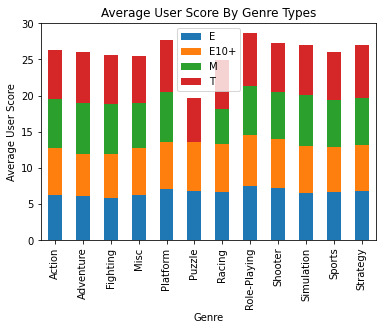

In [34]:
stacked_bar_chart_avg_user_genre = pd.DataFrame(index=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle','Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy'], 
                                                data = {'E': [6.277486910994765,6.122448979591836,5.833333333333333,6.306748466257669,7.104166666666667,6.876404494382022,6.731428571428571,7.534246575342466,7.2272727272727275,6.592233009708738,6.704244031830239,6.880952380952381], 
                        'E10+': [6.431438127090301,5.84375,6.142857142857143,6.3875,6.4423076923076925,6.75,6.620253164556962,6.96,6.794117647058823,6.5,6.162162162162162,6.241935483870968], 
                        'M': [6.861759425493716,7.0588235294117645,6.8,6.2727272727272725,7.0,0,4.823529411764706,6.842105263157895,6.537284894837476,7.0,6.545454545454546,6.583333333333333], 
                        'T': [6.694158075601375, 7.048780487804878,6.875399361022364,6.51937984496124,7.089285714285714,6.0,6.792592592592593,7.281653746770026,6.76140350877193,6.906832298136646,6.586538461538462,7.239130434782608]})

ax = stacked_bar_chart_avg_user_genre.plot(kind="bar", stacked=True)
plt.title("Average User Score By Genre Types")
plt.xlabel("Genre")
plt.ylabel("Average User Score")
plt.savefig('Resources/Average_score_png')
plt.show()


In [28]:
sorted_genre_user_score_df

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total_Average_User_Score
User Score,,,,,,,,,,,,,
T,7.137113,7.463415,7.351757,6.977519,7.516071,6.400000,7.231852,7.723514,7.185614,7.350311,7.016346,7.669565,7.251923
E,6.742932,6.546939,6.350000,6.758896,7.552917,7.317978,7.161143,7.972603,7.640909,7.028155,7.173475,7.352381,7.133194
E10+,6.831438,6.375000,6.607143,6.837500,6.892308,7.179167,7.025316,7.399000,7.261765,6.885714,6.616216,6.782258,6.891069
M,7.312926,7.518824,7.297778,6.736364,7.533333,0.000000,5.288235,7.325658,6.997706,7.460000,7.036364,7.029167,6.461363


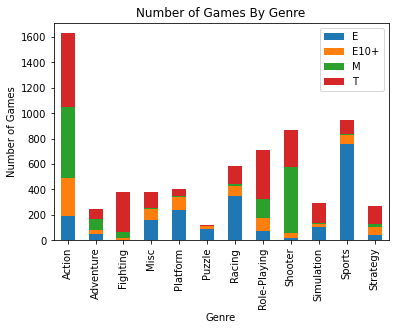

In [35]:
stacked_bar_chart_games_purchased_by_genre = pd.DataFrame(index=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle','Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy'], 
                                                data = {'E': [191, 49, 6, 163, 240, 89, 350, 73, 22, 103, 754, 42], 
                        'E10+': [299, 32, 14, 80, 104, 24, 79, 100, 34, 28, 74, 62], 
                        'M': [557, 85, 45, 11, 3, 0, 17, 152, 523, 5, 11, 24], 
                        'T': [582, 82, 313, 129, 56, 5, 135, 387, 285, 161, 104, 138]})

stacked_bar_chart_games_purchased_by_genre=stacked_bar_chart_games_purchased_by_genre.plot(kind="bar", stacked=True)
plt.title("Number of Games By Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.savefig('Resources/Number_of_games_png')
plt.show()


In [30]:
sorted_genre_counting_df

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total Genre Count
Rating,,,,,,,,,,,,,
T,582,82,313,129,56,5,135,387,285,161,104,138,2377
E,191,49,6,163,240,89,350,73,22,103,754,42,2082
M,557,85,45,11,3,0,17,152,523,5,11,24,1433
E10+,299,32,14,80,104,24,79,100,34,28,74,62,930
